# GSK - DIGDATA ONLINE STEP-UP CAREER CHALLENGE Path A

## THE PROBLEM:
A new cancer treatment for solid tumours (Miraculon-B) is in development at GSK, data has
been collected in our recent clinical trial comparing Miraculon-B to the current standard of
care (i.e., referred to as the ‘control’). The trial has completed, and we need your help to
analyse the data and assess the effectiveness of Miraculon-B. To do this we need you to
compare Miraculon-B to the standard of care, and explore how different patient sub-groups
may benefit differently from treatment.

## 1. Read in the data 

In [2]:
import pandas as pd
import numpy as np

In [18]:
df=pd.read_excel('C:/Users/mifab/Downloads/wetransfer_analytical_roles-pdf_2023-05-04_1151/clinical-study.xlsx')
df

subject_id     age     sex  weight   height  trt_grp RESPONSE
0     SUBJ_001  46.000  Female  84.660  1.59000     DRUG        N
1     SUBJ_001  46.000  Female  84.660  1.59000     DRUG        N
2     SUBJ_002  47.000  Female  71.210  1.64000     DRUG        Y
3     SUBJ_003  48.000  Female  69.850  1.73000  CONTROL        N
4     SUBJ_004  59.000  Female  62.940  1.50000     DRUG        Y
..         ...     ...     ...     ...      ...      ...      ...
767   SUBJ_767  53.000    Male  88.670  1.72000     DRUG        Y
768   SUBJ_768  68.000  Female  80.290  1.63000     DRUG        Y
769   SUBJ_A69   7.200  Female  22.310  1.19300     DRUG        N
770   SUBJ_A70   8.310  Female  24.220  1.27440  CONTROL        N
771   SUBJ_A71   7.854    Male  23.176  1.26343  CONTROL        N

[772 rows x 7 columns]

## 2. Examine the data

The dataset clinical-study.csv contains 772 rows (patients) and 7 columns (variables).

These variables are: subject_id, age, sex, weight, height, trt_grp and RESPONSE.

Subject_id has unique string values.

Age is a numeric variable.

Weight is a numeric variable.

Height is a numeric variable.

trt_grp is a binary categorical variable (CONTROL/DRUG).

RESPONSE is a binary categorical variable (Y/N).

## 3. Clean-up the data

### Find Duplicates and remove

In [19]:
duplicateRows = df[df.duplicated()]
duplicateRows

subject_id   age     sex  weight  height trt_grp RESPONSE
1   SUBJ_001  46.0  Female   84.66    1.59    DRUG        N

In [20]:
df.drop(index=0,inplace=True)

### Find Underage and remove

In [21]:
UnderAge = df[df.age<18]
UnderAge

subject_id    age     sex  weight   height  trt_grp RESPONSE
769   SUBJ_A69  7.200  Female  22.310  1.19300     DRUG        N
770   SUBJ_A70  8.310  Female  24.220  1.27440  CONTROL        N
771   SUBJ_A71  7.854    Male  23.176  1.26343  CONTROL        N

In [22]:
df.drop(df[df.age<18].index, inplace=True)

### Find NA and replace with gender-wise mean

In [26]:
ISNULL=df[df.isna().any(axis=1)]
ISNULL

subject_id   age     sex  weight  height  trt_grp RESPONSE
10    SUBJ_010  73.0  Female     NaN    1.64     DRUG        Y
50    SUBJ_050  65.0    Male     NaN    1.71     DRUG        N
61    SUBJ_061  61.0    Male     NaN    1.79  CONTROL        N
82    SUBJ_082  65.0    Male     NaN    1.78  CONTROL        N
146   SUBJ_146  56.0  Female     NaN    1.57  CONTROL        N
372   SUBJ_372  67.0  Female     NaN    1.62  CONTROL        N
427   SUBJ_427  66.0    Male     NaN    1.83  CONTROL        N
495   SUBJ_495  60.0  Female     NaN    1.65  CONTROL        N
523   SUBJ_523  62.0  Female     NaN    1.60     DRUG        N
685   SUBJ_685  74.0    Male     NaN    1.81  CONTROL        N
707   SUBJ_707  72.0    Male     NaN    1.75     DRUG        Y

In [31]:
df['weight'] = df['weight'].fillna(df.groupby('sex')['weight'].transform('mean'))
df

subject_id   age     sex  weight  height  trt_grp RESPONSE
1     SUBJ_001  46.0  Female   84.66    1.59     DRUG        N
2     SUBJ_002  47.0  Female   71.21    1.64     DRUG        Y
3     SUBJ_003  48.0  Female   69.85    1.73  CONTROL        N
4     SUBJ_004  59.0  Female   62.94    1.50     DRUG        Y
5     SUBJ_005  59.0  Female  113.91    1.63  CONTROL        N
..         ...   ...     ...     ...     ...      ...      ...
764   SUBJ_764  61.0  Female   82.95    1.59  CONTROL        Y
765   SUBJ_765  65.0    Male  112.86    1.76     DRUG        N
766   SUBJ_766  60.0    Male   81.03    1.77     DRUG        N
767   SUBJ_767  53.0    Male   88.67    1.72     DRUG        Y
768   SUBJ_768  68.0  Female   80.29    1.63     DRUG        Y

[768 rows x 7 columns]

## 4. Create new variable

### BMI

In [37]:
df['BMI']=df['weight']/(df['height']*df['height'])
df

subject_id   age     sex  weight  height  trt_grp RESPONSE        BMI
1     SUBJ_001  46.0  Female   84.66    1.59     DRUG        N  33.487599
2     SUBJ_002  47.0  Female   71.21    1.64     DRUG        Y  26.476056
3     SUBJ_003  48.0  Female   69.85    1.73  CONTROL        N  23.338568
4     SUBJ_004  59.0  Female   62.94    1.50     DRUG        Y  27.973333
5     SUBJ_005  59.0  Female  113.91    1.63  CONTROL        N  42.873273
..         ...   ...     ...     ...     ...      ...      ...        ...
764   SUBJ_764  61.0  Female   82.95    1.59  CONTROL        Y  32.811202
765   SUBJ_765  65.0    Male  112.86    1.76     DRUG        N  36.434659
766   SUBJ_766  60.0    Male   81.03    1.77     DRUG        N  25.864215
767   SUBJ_767  53.0    Male   88.67    1.72     DRUG        Y  29.972282
768   SUBJ_768  68.0  Female   80.29    1.63     DRUG        Y  30.219429

[768 rows x 8 columns]

### Protein concentration

In [70]:
pl=pd.read_excel('C:/Users/mifab/Downloads/wetransfer_analytical_roles-pdf_2023-05-04_1151/protein-levels.xlsx')
pl

participant_id  protein_concentration
0         SUBJ_001                  148.0
1         SUBJ_002                   85.0
2         SUBJ_003                  183.0
3         SUBJ_004                   89.0
4         SUBJ_005                  137.0
..             ...                    ...
763       SUBJ_764                  101.0
764       SUBJ_765                  122.0
765       SUBJ_766                  121.0
766       SUBJ_767                  126.0
767       SUBJ_768                   93.0

[768 rows x 2 columns]

The dataset protein-levels.csv contains 768 rows and 2 columns.

Participant_id has unique string values.

Protein_concentration is a numeric variable

### Replace NA of protein concentration

In [71]:
ISNULLpl=pl[pl.isna().any(axis=1)]
ISNULLpl

participant_id  protein_concentration
75        SUBJ_076                    NaN
182       SUBJ_183                    NaN
342       SUBJ_343                    NaN
349       SUBJ_350                    NaN
502       SUBJ_503                    NaN

In [72]:
pl['protein_concentration'] = pl['protein_concentration'].fillna((pl['protein_concentration'].mean()))

### Merge with main dataframe

In [73]:
df_f=df.merge(pl, left_on='subject_id', right_on='participant_id')
df_f.drop(columns='participant_id',inplace=True)
df_f

subject_id   age     sex  weight  height  trt_grp RESPONSE        BMI  \
0     SUBJ_001  46.0  Female   84.66    1.59     DRUG        N  33.487599   
1     SUBJ_002  47.0  Female   71.21    1.64     DRUG        Y  26.476056   
2     SUBJ_003  48.0  Female   69.85    1.73  CONTROL        N  23.338568   
3     SUBJ_004  59.0  Female   62.94    1.50     DRUG        Y  27.973333   
4     SUBJ_005  59.0  Female  113.91    1.63  CONTROL        N  42.873273   
..         ...   ...     ...     ...     ...      ...      ...        ...   
763   SUBJ_764  61.0  Female   82.95    1.59  CONTROL        Y  32.811202   
764   SUBJ_765  65.0    Male  112.86    1.76     DRUG        N  36.434659   
765   SUBJ_766  60.0    Male   81.03    1.77     DRUG        N  25.864215   
766   SUBJ_767  53.0    Male   88.67    1.72     DRUG        Y  29.972282   
767   SUBJ_768  68.0  Female   80.29    1.63     DRUG        Y  30.219429   

     protein_concentration  
0                    148.0  
1                     85.0  
2                    183.0  
3                     89.0  
4                    137.0  
..                     ...  
763                  101.0  
764                  122.0  
765                  121.0  
766                  126.0  
767                   93.0  

[768 rows x 9 columns]

## 5. Aggregate the data

### Compare mean age in two treatment groups

In [74]:
mean_age_t=df_f.groupby('trt_grp')['age'].mean()
display(pd.DataFrame(mean_age_t))

age
trt_grp           
CONTROL  61.862338
DRUG     61.759791

### Compare mean age in responders vs non-responders

In [75]:
mean_age_r=df_f.groupby('RESPONSE')['age'].mean()
display(pd.DataFrame(mean_age_r))

age
RESPONSE           
N         61.748848
Y         61.892216

### Compare responders and non-responders in the two treatment arms

In [76]:
mean_age=df_f.groupby('trt_grp')['RESPONSE'].value_counts(normalize=True)
display(pd.DataFrame(mean_age))

RESPONSE
trt_grp RESPONSE          
CONTROL N         0.677922
        Y         0.322078
DRUG    Y         0.548303
        N         0.451697

### Compare mean weight in responders/non-responders etc

In [77]:
mean_w=df_f.groupby('RESPONSE')['weight'].mean()
display(pd.DataFrame(mean_w))

weight
RESPONSE           
N         89.973428
Y         93.251638

### Compare protein concentration in responders vs non responders

In [78]:
mean_p=df_f.groupby('RESPONSE')['protein_concentration'].mean()
display(pd.DataFrame(mean_p))

protein_concentration
RESPONSE                       
N                    134.884932
Y                    104.537046

## Further EDA

In [79]:
from ydata_profiling import ProfileReport

In [80]:
prof = ProfileReport(df_f)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 6. Visualise the data

### Boxplot of age(y-axis) by response (x-axis)

In [84]:
import plotly.express as px
fig = px.box(df_f, x="RESPONSE", y="age", color="RESPONSE")
fig.show()

#### Also separated by treatment group

In [86]:
fig = px.box(df_f, x="RESPONSE", y="age", color="trt_grp")
fig.show()

### Boxplot of weight/BMI(y-axis) by response (x-axis)

In [87]:
fig = px.box(df_f, x="RESPONSE", y="BMI", color="RESPONSE")
fig.show()

#### Also separated by treatment group?

In [88]:
fig = px.box(df_f, x="RESPONSE", y="BMI", color="trt_grp")
fig.show()

### Boxplot of protein_concentration (y-axis) by response (x-axis)

In [89]:
fig = px.box(df_f, x="RESPONSE", y="protein_concentration", color="RESPONSE")
fig.show()

#### Also separated by treatment group?

In [90]:
fig = px.box(df_f, x="RESPONSE", y="protein_concentration", color="trt_grp")
fig.show()

## 7. Modelling (advanced task1)

## Visualise Class Ratio

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

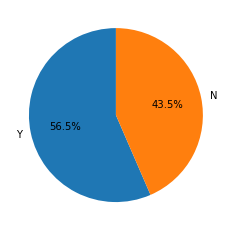

In [104]:
detail= df_f['RESPONSE'].value_counts()
plt.pie(detail,labels =['Y','N'],autopct='%1.1f%%', startangle = 90)
plt.show()

### too few examples to undersample, ratio is good enough.

## Encode Categorical Variables

In [126]:
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, auc, roc_curve
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV

In [127]:
labelencoder = LabelEncoder()
df_f['sex'] = labelencoder.fit_transform(df_f['sex'])
df_f['trt_grp'] = labelencoder.fit_transform(df_f['trt_grp'])
df_f['RESPONSE'] = labelencoder.fit_transform(df_f['RESPONSE'])
df_f

subject_id   age  sex  weight  height  trt_grp  RESPONSE        BMI  \
0     SUBJ_001  46.0    0   84.66    1.59        1         0  33.487599   
1     SUBJ_002  47.0    0   71.21    1.64        1         1  26.476056   
2     SUBJ_003  48.0    0   69.85    1.73        0         0  23.338568   
3     SUBJ_004  59.0    0   62.94    1.50        1         1  27.973333   
4     SUBJ_005  59.0    0  113.91    1.63        0         0  42.873273   
..         ...   ...  ...     ...     ...      ...       ...        ...   
763   SUBJ_764  61.0    0   82.95    1.59        0         1  32.811202   
764   SUBJ_765  65.0    1  112.86    1.76        1         0  36.434659   
765   SUBJ_766  60.0    1   81.03    1.77        1         0  25.864215   
766   SUBJ_767  53.0    1   88.67    1.72        1         1  29.972282   
767   SUBJ_768  68.0    0   80.29    1.63        1         1  30.219429   

     protein_concentration  
0                    148.0  
1                     85.0  
2                    183.0  
3                     89.0  
4                    137.0  
..                     ...  
763                  101.0  
764                  122.0  
765                  121.0  
766                  126.0  
767                   93.0  

[768 rows x 9 columns]

## Obtain Variables and Response DF

In [128]:
X = df_f.drop(['subject_id','RESPONSE'], axis=1)
X

age  sex  weight  height  trt_grp        BMI  protein_concentration
0    46.0    0   84.66    1.59        1  33.487599                  148.0
1    47.0    0   71.21    1.64        1  26.476056                   85.0
2    48.0    0   69.85    1.73        0  23.338568                  183.0
3    59.0    0   62.94    1.50        1  27.973333                   89.0
4    59.0    0  113.91    1.63        0  42.873273                  137.0
..    ...  ...     ...     ...      ...        ...                    ...
763  61.0    0   82.95    1.59        0  32.811202                  101.0
764  65.0    1  112.86    1.76        1  36.434659                  122.0
765  60.0    1   81.03    1.77        1  25.864215                  121.0
766  53.0    1   88.67    1.72        1  29.972282                  126.0
767  68.0    0   80.29    1.63        1  30.219429                   93.0

[768 rows x 7 columns]

### Scale X

In [142]:
scaled_features = X.copy()
col_names = ['age', 'weight','height','BMI','protein_concentration']
features = scaled_features[col_names]
scaler = MinMaxScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names] = features
display(scaled_features)

age  sex    weight    height  trt_grp       BMI  \
0    0.214286    0  0.282330  0.326923        1  0.313123   
1    0.238095    0  0.183672  0.423077        1  0.171591   
2    0.261905    0  0.173696  0.596154        0  0.108259   
3    0.523810    0  0.123010  0.153846        1  0.201814   
4    0.523810    0  0.496883  0.403846        0  0.502579   
..        ...  ...       ...       ...      ...       ...   
763  0.571429    0  0.269787  0.326923        0  0.299470   
764  0.666667    1  0.489181  0.653846        1  0.372611   
765  0.547619    1  0.255703  0.673077        1  0.159240   
766  0.380952    1  0.311744  0.576923        1  0.242164   
767  0.738095    0  0.250275  0.403846        1  0.247153   

     protein_concentration  
0                 0.670968  
1                 0.264516  
2                 0.896774  
3                 0.290323  
4                 0.600000  
..                     ...  
763               0.367742  
764               0.503226  
765               0.496774  
766               0.529032  
767               0.316129  

[768 rows x 7 columns]

In [143]:
y = df_f['RESPONSE']
display(y)

0      0
1      1
2      0
3      1
4      0
      ..
763    1
764    0
765    0
766    1
767    1
Name: RESPONSE, Length: 768, dtype: int64

In [144]:
X_train,X_test, y_train, y_test = train_test_split(scaled_features, y, test_size=0.2, random_state=42)

## Train Models and Compare

We set to compare a range of classifiers to obtain the best performance on the dataset

In [145]:
models = {
    "Logistic Regression": LogisticRegression(random_state=0),
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "Random Forest": RandomForestClassifier(random_state=0),
    "Gradient Boosting": GradientBoostingClassifier(random_state=0),
    "K-Nearest Neighbours": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC()
}

In [146]:
model_df = []
accuracy = []
precision = []
recall = []
f1 = []

for model, model_launch in models.items():
    
    # Loop through listed models
    model_initiated = model_launch
    model_initiated.fit(X_train, y_train)
    predictions = model_initiated.predict(X_test)
    
    # Model Names
    model_df.append(model)
    
    # Model Scores
    accuracy.append(accuracy_score(y_test, predictions))
    precision.append(precision_score(y_test, predictions))
    recall.append(recall_score(y_test, predictions))
    f1.append(f1_score(y_test, predictions))
    
    # Model Names & Scores in to a DataFrame
    
    scores_df_stand = pd.DataFrame({'Model':model_df,
                              'Accuracy': accuracy, 
                              'Precision': precision,
                              'Recall': recall,
                              'F1':f1}).sort_values(by='Accuracy', ascending=False)
    
    
    
# Stylised DataFrame to help quickly grasp top performing models across metrics
scores_df_stand

(scores_df_stand.style
  .background_gradient(subset=['Accuracy','Precision','Recall','F1'])
  .highlight_max(subset=['Accuracy','Precision','Recall','F1'], color='gold')
  .set_caption('Model Performance with Standard Scaled X Data')
  .format({'Accuracy': "{:.2%}",
           'Precision': "{:.2%}",
           'Recall': "{:.2%}",
           'F1': "{:.2%}"
          }))

## Explain best model with Shapley

In [149]:
import shap

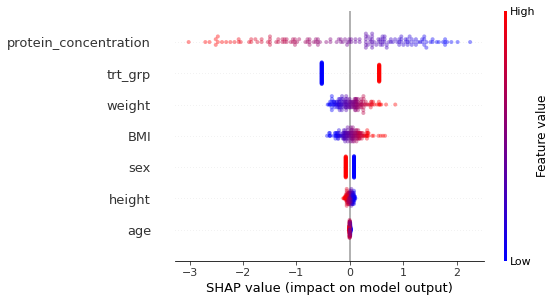

In [158]:
model = LogisticRegression()
model.fit(X_train, y_train)

explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

colors = ["b", "r"]           
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
shap.summary_plot(shap_values, X_test,cmap=cmap,alpha=0.4)

## Questions

• Do patients that take the GSK drug respond more to treatment compared to those in the control group?

Yes, the group with a positive response goes up from 32.2% to 54.8%.

• Can the age, weight or protein concentration of patients predict whether they will respond better to treatment or not?

Yes, protein concentration is the most relevant feature, followed by treatment group, weight, BMI, sex, height and age.


## Conclusions

1) A baseline model was developed to predict the TARGET column. 

2) The Model could be improved via new features of the patients or other biomarkers.